<a href="https://colab.research.google.com/github/nepalprabin/fastai/blob/master/Multi_label_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *

**Getting the Data**

In [3]:
!pip install kaggle --upgrade

Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.6)


**Uploading kaggle API token into google colab**

In [5]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"prabin96","key":"21196fe9aeeb323124eed1a4a0f8388a"}'}

In [0]:
!mkdir -p ~/.kaggle

In [0]:
!cp kaggle.json ~/.kaggle/

In [0]:
!chmod 600 kaggle.json

In [20]:
!kaggle datasets list

ref                                                            title                                                size  lastUpdated          downloadCount  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
paultimothymooney/covid19-containment-and-mitigation-measures  COVID-19 containment and mitigation measures         91KB  2020-03-30 14:01:44            737  
allen-institute-for-ai/CORD-19-research-challenge              COVID-19 Open Research Dataset Challenge (CORD-19)  729MB  2020-03-27 23:46:53          36747  
skylord/coronawhy                                              CoronaWhy                                             2GB  2020-03-30 18:07:00            118  
unanimad/dataisbeautiful                                       Reddit - Data is Beautiful                           11MB  2020-03-21 22:28:28           1342  
rubenssjr/brasilian-houses-to-rent            

In [21]:
path = Config.data_path()/'planet'
path.mkdir(parents=True,exist_ok=True)
path

PosixPath('/root/.fastai/data/planet')

**Downloading data**

In [25]:
from google.colab import files
files.upload()

Saving cookies.txt to cookies.txt


{'cookies.txt': b'# HTTP Cookie File downloaded with cookies.txt by Genuinous @genuinous\n# This file can be used by wget, curl, aria2c and other standard compliant tools.\n# Usage Examples:\n#   1) wget -x --load-cookies cookies.txt "https://www.kaggle.com/c/planet-understanding-the-amazon-from-space/data"\n#   2) curl --cookie cookies.txt "https://www.kaggle.com/c/planet-understanding-the-amazon-from-space/data"\n#   3) aria2c --load-cookies cookies.txt "https://www.kaggle.com/c/planet-understanding-the-amazon-from-space/data"\n#\n.kaggle.com\tTRUE\t/\tFALSE\t1646392072\t_ga\tGA1.2.1203823885.1582883874\nwww.kaggle.com\tFALSE\t/\tFALSE\t1598643240\tka_sessionid\t6bc77ce3-8a4f-481b-8d05-a4b2151b3f94\nwww.kaggle.com\tFALSE\t/\tTRUE\t1587045376\t.ASPXAUTH\tFD8BBC171A717D6E43A39A91620ED8644E30BFB5F567A7134584C4470AB5CE1C0AB3A273FB9ED0B7D06FE2B8D45CAD22883D2A31BCC508C5B04FE681E42393CA702F6B9538C0C8D1E9468C26F6E798E6A4FBEED0\nwww.kaggle.com\tFALSE\t/\tTRUE\t0\tCSRF-TOKEN\tCfDJ8LdUzqlsSWBPr

In [27]:
!pwd

/content


In [30]:
! wget --load-cookies cookies.txt https://www.kaggle.com/c/planet-understanding-the-amazon-from-space/download-directory/fBesYSh7qE3PuxXtB1SS%2Fversions%2FDMmq3a6XjGpH6e8EUe3c%2Fdirectories%2Ftrain-jpg.tar

--2020-03-30 20:15:45--  https://www.kaggle.com/c/planet-understanding-the-amazon-from-space/download-directory/fBesYSh7qE3PuxXtB1SS%2Fversions%2FDMmq3a6XjGpH6e8EUe3c%2Fdirectories%2Ftrain-jpg.tar
Resolving www.kaggle.com (www.kaggle.com)... 35.244.233.98
Connecting to www.kaggle.com (www.kaggle.com)|35.244.233.98|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/6322/868312/upload/train-jpg.tar.7z?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1585858545&Signature=MVZBJdGIascwCDGD%2Fxut0gPT8soa%2FfZIeWo6A4PJ2XjWu2Z5Kyk8FEGDDgfo0ABSI8vXImx%2F%2Fd5tGQ8IYwAfU6PKKHo2ILLeWD%2BOwE7LmSluiv8Uq8vVnpOOCGLVI7%2Bt0v1aXmZ9DEtTNHRD%2FnKpkAkVXs3q0eHOFsZWSTdLj8k6t2o53NniP0Ujf8TIXuphZ7WOi%2B5fDw2349lkSpn4ECkmITnh8jwZwYsfFSa686lfP5BDIsBGUmqJq7LclZpptJCswuvXVobxfhvMQ4019B8tTS8ZIYJarCHHUMxuRr5iqIwJ%2BBk2OsckvHyU1vcPpr3KBcicQMq36dRBJBB0eQ%3D%3D&response-content-disposition=attachment%3B+fi

In [0]:
! 7za -bd -y -so x /content/fBesYSh7qE3PuxXtB1SS%2Fversions%2FDMmq3a6XjGpH6e8EUe3c%2Fdirectories%2Ftrain-jpg.tar.2 | tar xf - -C {path.as_posix()}

In [35]:
from google.colab import files
files.upload()

Saving cookies.txt to cookies (2).txt


{'cookies.txt': b'# HTTP Cookie File downloaded with cookies.txt by Genuinous @genuinous\n# This file can be used by wget, curl, aria2c and other standard compliant tools.\n# Usage Examples:\n#   1) wget -x --load-cookies cookies.txt "https://www.kaggle.com/c/planet-understanding-the-amazon-from-space/data"\n#   2) curl --cookie cookies.txt "https://www.kaggle.com/c/planet-understanding-the-amazon-from-space/data"\n#   3) aria2c --load-cookies cookies.txt "https://www.kaggle.com/c/planet-understanding-the-amazon-from-space/data"\n#\n.kaggle.com\tTRUE\t/\tFALSE\t1646392072\t_ga\tGA1.2.1203823885.1582883874\nwww.kaggle.com\tFALSE\t/\tFALSE\t1598643240\tka_sessionid\t6bc77ce3-8a4f-481b-8d05-a4b2151b3f94\nwww.kaggle.com\tFALSE\t/\tTRUE\t1587045376\t.ASPXAUTH\tFD8BBC171A717D6E43A39A91620ED8644E30BFB5F567A7134584C4470AB5CE1C0AB3A273FB9ED0B7D06FE2B8D45CAD22883D2A31BCC508C5B04FE681E42393CA702F6B9538C0C8D1E9468C26F6E798E6A4FBEED0\nwww.kaggle.com\tFALSE\t/\tTRUE\t0\tCSRF-TOKEN\tCfDJ8LdUzqlsSWBPr

In [36]:
! wget --load-cookies cookies.txt https://www.kaggle.com/c/planet-understanding-the-amazon-from-space/download/fBesYSh7qE3PuxXtB1SS%2Fversions%2FDMmq3a6XjGpH6e8EUe3c%2Fdirectories%2Ftrain_v2.csv%2Ffiles%2Ftrain_v2.csv

--2020-03-30 20:23:03--  https://www.kaggle.com/c/planet-understanding-the-amazon-from-space/download/fBesYSh7qE3PuxXtB1SS%2Fversions%2FDMmq3a6XjGpH6e8EUe3c%2Fdirectories%2Ftrain_v2.csv%2Ffiles%2Ftrain_v2.csv
Resolving www.kaggle.com (www.kaggle.com)... 35.244.233.98
Connecting to www.kaggle.com (www.kaggle.com)|35.244.233.98|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/6322/868312/compressed/train_v2.csv/train_v2.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1585858983&Signature=puH44xh2uts%2BgJM5LLv%2BF7OSk5Bt%2BbVZOF8Y60OjpHzkbWlpFXMIDleULuYQkeog8ijwzXJGkZhoEDT49GB4ZXaoaVFnuu58pmGiiUKaFG1kZWfpzY14nBpnO3aFRSZYx9o8ihfX8EgD8qh1ZbTj1O3FMy0Bum%2BCB5%2FWnzwIiVLsWnAyWj7T04q2WcRHNz2%2BQAeKZDMN%2FWqts%2F5o%2FGE2lNdDXQEbf7%2FCcblrwBkMtGBrh1YF5ihJhDoxN3Cd1Yjdfztj4x1vNs1exEH9TdkFdHkHrWl%2FEUNMJ4yYR7oPOcRcb41Pvig8qeP%2Fzuj2zn%2FpXQTIk%2FgUKFmRsGpYoz8mbg%3D%3D&respon

In [0]:
! unzip -q -n /content/fBesYSh7qE3PuxXtB1SS%2Fversions%2FDMmq3a6XjGpH6e8EUe3c%2Fdirectories%2Ftrain_v2.csv%2Ffiles%2Ftrain_v2.csv -d {path}

**Multiclassification**

In [38]:
df = pd.read_csv(path/'train_v2.csv')
df.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [0]:
tfms = get_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.)

In [0]:
np.random.seed(42)
src = (ImageList.from_csv(path, 'train_v2.csv', folder='train-jpg', suffix='.jpg')
       .split_by_rand_pct(0.2)
       .label_from_df(label_delim=' '))

In [0]:
data = (src.transform(tfms, size=128)
        .databunch().normalize(imagenet_stats))

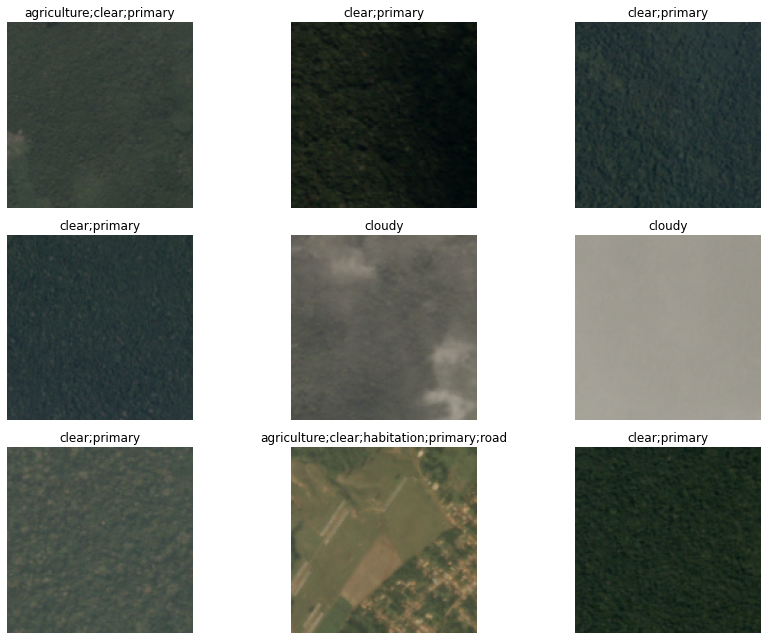

In [42]:
data.show_batch(rows=3, figsize=(12,9))

In [0]:
arch = models.resnet50

In [44]:
acc_02 = partial(accuracy_thresh, thresh=0.2)
f_score = partial(fbeta, thresh=0.2)
learn = cnn_learner(data, arch, metrics=[acc_02, f_score])

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [47]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


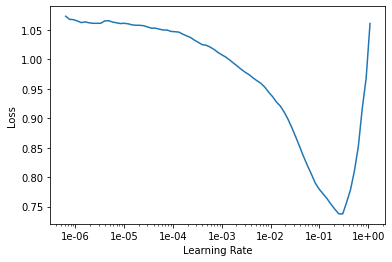

In [48]:
learn.recorder.plot()

In [0]:
lr = 0.01

In [50]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.139569,0.116798,0.941918,0.900144,02:44
1,0.112565,0.101526,0.948930,0.907959,02:45
2,0.102365,0.092605,0.950056,0.918972,02:41
3,0.095219,0.087387,0.955252,0.925193,02:39
4,0.088751,0.086993,0.956051,0.925325,02:44


In [0]:
learn.save('stage-1-rn50')

In [0]:
learn.unfreeze()

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


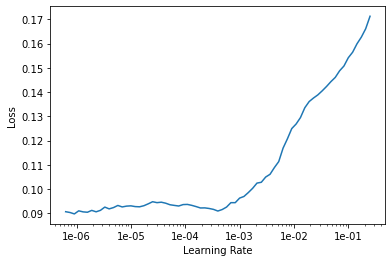

In [53]:
learn.lr_find()
learn.recorder.plot()

In [54]:
learn.fit_one_cycle(5, slice(1e-5, lr/5))

epoch,train_loss,valid_loss,accuracy_thresh,fbeta,time
0,0.097339,0.093331,0.952563,0.917737,02:58
1,0.097776,0.090246,0.954118,0.922355,03:02
2,0.090605,0.085959,0.954235,0.925078,03:00
3,0.085043,0.083156,0.959750,0.929622,03:03
4,0.078987,0.082640,0.958624,0.929099,02:57


In [0]:
learn.save('stage-2-rn50')

In [56]:
data = (src.transform(tfms, size=256)
        .databunch().normalize(imagenet_stats))
learn.data = data
data.train_ds[0][0].shape

torch.Size([3, 256, 256])

In [0]:
learn.freeze()